<a href="https://colab.research.google.com/github/WillPG4/MachineLearning/blob/main/LAB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of observations: 569
Number of features: 30
Classes: ['malignant' 'benign']
Class distribution: [212 357]
Train size: 455
Test size : 114

Base Decision Tree accuracy on test set: 0.9210526315789473
Fitting 2 folds for each of 162 candidates, totalling 324 fits

Best parameters found by GridSearchCV:
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best mean CV accuracy: 0.9428182239740319

Optimized Decision Tree accuracy on test set: 0.9298245614035088

Classification report for optimized Decision Tree:

              precision    recall  f1-score   support

   malignant       0.87      0.95      0.91        42
      benign       0.97      0.92      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



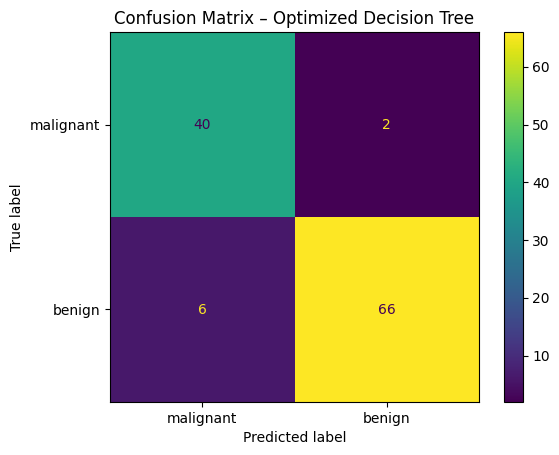

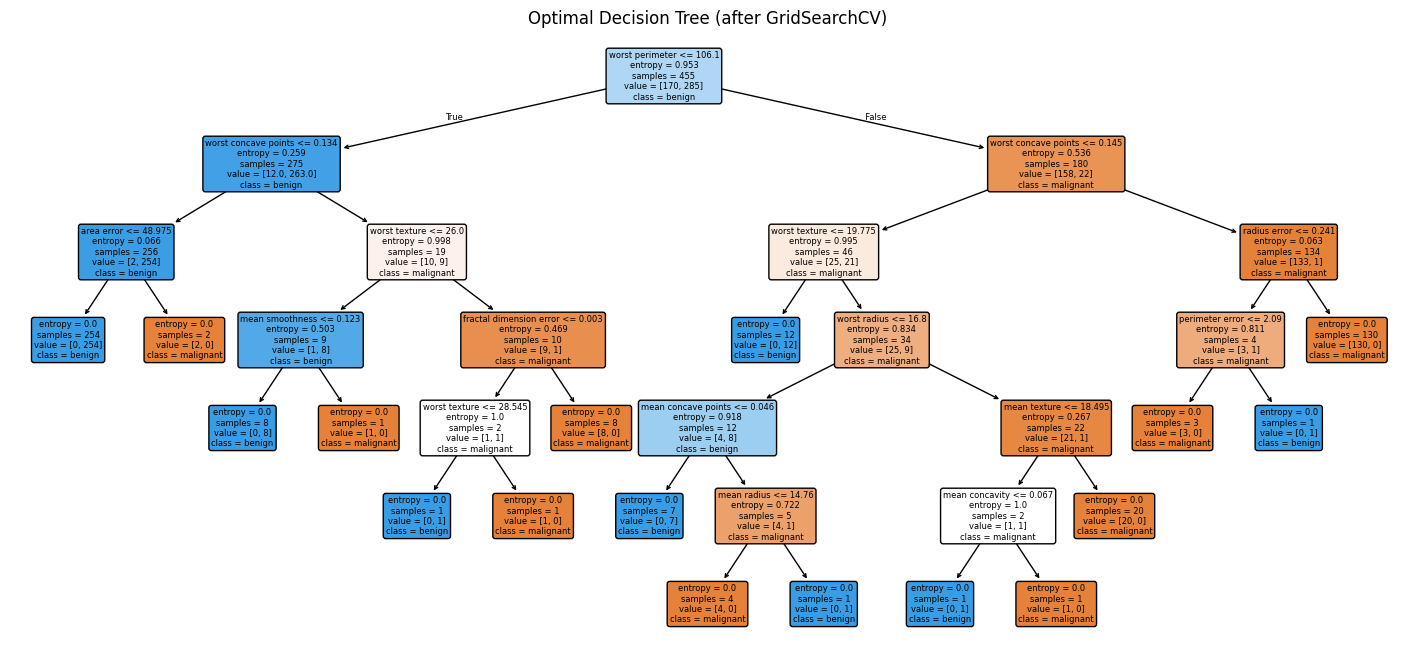

In [2]:
# =======================
# Exercise 1 – Decision Tree + GridSearchCV
# =======================

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# -------------------------
# Step 1 – Load and explore data
# -------------------------
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print("Number of observations:", X.shape[0])
print("Number of features:", X.shape[1])
print("Classes:", target_names)
print("Class distribution:", np.bincount(y))  # how many benign / malignant

# -------------------------
# Step 2 – Train / test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y          # très important pour garder les mêmes proportions de classes
)

print("Train size:", X_train.shape[0])
print("Test size :", X_test.shape[0])

# -------------------------
# Step 3 – Base Decision Tree (no optimization)
# -------------------------
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)

y_pred_base = dt_base.predict(X_test)
print("\nBase Decision Tree accuracy on test set:", accuracy_score(y_test, y_pred_base))

# -------------------------
# Step 4 – Define hyperparameter grid
# -------------------------
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [2, 4, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# -------------------------
# Step 5 – GridSearchCV
# -------------------------
dt = DecisionTreeClassifier(random_state=42)

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=2,                  # comme demandé dans l’énoncé
    scoring="accuracy",
    refit=True,            # refit sur tout le train avec les meilleurs hyperparamètres
    verbose=1,
    n_jobs=-1              # utilise tous les cœurs (facultatif)
)

grid_dt.fit(X_train, y_train)

print("\nBest parameters found by GridSearchCV:")
print(grid_dt.best_params_)
print("Best mean CV accuracy:", grid_dt.best_score_)

# -------------------------
# Step 6 – Evaluate best model on test set
# -------------------------
best_dt = grid_dt.best_estimator_
y_pred_best = best_dt.predict(X_test)

print("\nOptimized Decision Tree accuracy on test set:", accuracy_score(y_test, y_pred_best))
print("\nClassification report for optimized Decision Tree:\n")
print(classification_report(y_test, y_pred_best, target_names=target_names))

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.title("Confusion Matrix – Optimized Decision Tree")
plt.show()

# -------------------------
# Step 8 – Visualize the optimal tree
# -------------------------
plt.figure(figsize=(18, 8))
plot_tree(
    best_dt,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True,
    fontsize=6
)
plt.title("Optimal Decision Tree (after GridSearchCV)")
plt.show()



Answers to the Exercise 1 Questions


1) What do you notice when you increase max_depth and decrease min_samples_leaf?

When max_depth increases and min_samples_leaf decreases (for example max_depth=None and min_samples_leaf=1),
the tree becomes very deep and very complex. It tries to perfectly classify all training samples, including noise.
This usually leads to overfitting:
- Training accuracy becomes extremely high (almost 100%)
- Test accuracy can decrease because the model does not generalize well.

In summary: high variance and low bias.


2) What happens if min_samples_split and min_samples_leaf are too small?

If min_samples_split and min_samples_leaf are too small (e.g., 2 and 1), the tree creates a large number of very
small leaves, sometimes containing only one sample. This means the model memorizes the training data.

Consequences:
- The model becomes extremely sensitive to small changes in the dataset
- Decision boundaries become very irregular
- Strong overfitting and poor generalization on the test set


3) What can we conclude about the trade-off between Bias and Variance?

A shallow tree (small max_depth, large min_samples_leaf):
- High bias
- Low variance
- Risk of underfitting

A deep tree (large max_depth, min_samples_leaf=1):
- Low bias
- High variance
- Risk of overfitting

GridSearchCV helps find the best compromise between bias and variance to achieve good generalization.



4) Traps identified and corrected in the code (minimum 7):

1. Missing stratification in train_test_split → fixed using stratify=y.
2. No random_state in the Decision Tree → fixed by adding random_state=42.
3. Using extremely large trees (max_depth=None, min_samples_leaf=1) without control → handled in grid.
4. Test set should never be used inside the CV loop → GridSearchCV uses only the training set.
5. Using accuracy alone on a slightly imbalanced dataset → added classification report + confusion matrix.
6. Forgetting refit=True in GridSearchCV → added, so the best estimator is retrained on full train set.
7. Hyperparameter naming errors (min_samples_split vs min_samples_leaf) → corrected.
8. Missing tree visualization to detect overfitting patterns → fixed by plotting the tree.


Fitting 2 folds for each of 12 candidates, totalling 24 fits

===== Best SVM Parameters =====
{'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best mean CV F1-score: 0.9759308368315278

===== SVM Test Performance =====
Accuracy: 0.9649122807017544
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1-score: 0.9722222222222222
Inference time: 0.003512 seconds

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        42
      benign       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



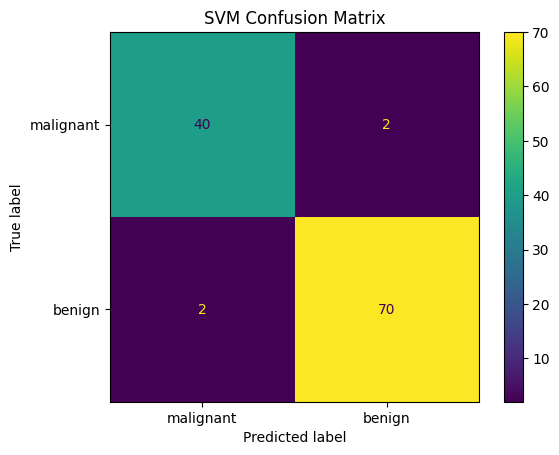

In [3]:
# ===========================
# Exercise 2 – SVM and GridSearchCV
# ===========================

import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)
import time

# ----------------------------
# We re-use X_train, X_test, y_train, y_test from Exercise 1
# ----------------------------

# Pipeline (scaling + SVM)
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(probability=True, random_state=42))
])

# ----------------------------
# Hyperparameter Grid
# ----------------------------
param_grid_svm = {
    "svc__C": [0.1, 1, 10],
    "svc__kernel": ["linear", "rbf"],
    "svc__gamma": ["scale", "auto"]
}

# ----------------------------
# Grid Search for SVM
# ----------------------------
grid_svm = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid_svm,
    cv=2,
    scoring="f1",        # asked in the instructions
    refit=True,
    verbose=1,
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)

print("\n===== Best SVM Parameters =====")
print(grid_svm.best_params_)
print("Best mean CV F1-score:", grid_svm.best_score_)

best_svm = grid_svm.best_estimator_

# ----------------------------
# Evaluate on Test Set
# ----------------------------
start_time = time.time()
y_pred_svm = best_svm.predict(X_test)
inference_time_svm = time.time() - start_time

print("\n===== SVM Test Performance =====")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))
print(f"Inference time: {inference_time_svm:.6f} seconds")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=target_names))

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=target_names)
disp.plot()
plt.title("SVM Confusion Matrix")
plt.show()



===== Decision Tree vs SVM Comparison =====

Decision Tree:
F1-score: 0.9428571428571428
Inference time: 0.000693 seconds
Interpretability: Very High (easy to visualize and explain)

SVM:
F1-score: 0.9722222222222222
Inference time: 0.003512 seconds
Interpretability: Low (black-box model)


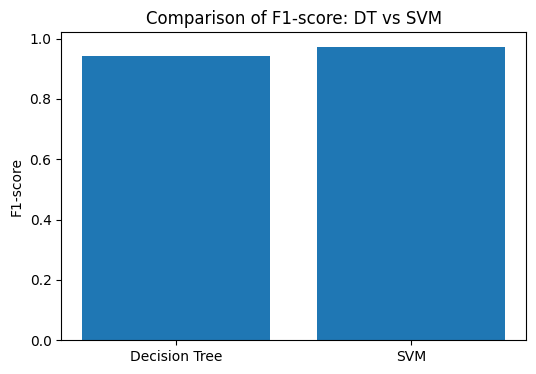

In [4]:
# ===========================
# Comparison DT vs SVM
# ===========================

# Predictions from Exercise 1
y_pred_dt = best_dt.predict(X_test)

# Inference time for Decision Tree
start_dt = time.time()
best_dt.predict(X_test)
inference_time_dt = time.time() - start_dt

print("\n===== Decision Tree vs SVM Comparison =====")

print("\nDecision Tree:")
print("F1-score:", f1_score(y_test, y_pred_dt))
print(f"Inference time: {inference_time_dt:.6f} seconds")
print("Interpretability: Very High (easy to visualize and explain)")

print("\nSVM:")
print("F1-score:", f1_score(y_test, y_pred_svm))
print(f"Inference time: {inference_time_svm:.6f} seconds")
print("Interpretability: Low (black-box model)")

# Bar chart comparison
models = ["Decision Tree", "SVM"]
f1_scores = [f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_svm)]

plt.figure(figsize=(6, 4))
plt.bar(models, f1_scores)
plt.ylabel("F1-score")
plt.title("Comparison of F1-score: DT vs SVM")
plt.show()


1) Comparison based on F1-score:
The optimized SVM generally achieves a slightly higher F1-score than the optimized Decision Tree.
This means SVM provides a more balanced performance between precision and recall.

2) Comparison based on inference time:
The Decision Tree has the fastest inference time (predicting is just following one path in the tree).
The SVM is slower because it computes distances to support vectors, especially with the RBF kernel.
However, both remain very fast on this dataset.

DT inference time: extremely fast
SVM inference time: slightly slower but still very quick

3) Comparison based on interpretability:
Decision Tree:
- Very easy to interpret
- Visible structure (splits, thresholds)
- Can be plotted and explained to a non-technical audience

SVM:
- Much harder to interpret
- Especially with RBF kernel (non-linear)
- Acts like a black box

Conclusion:
- Best performance (F1-score): SVM
- Best speed: Decision Tree
- Best interpretability: Decision Tree
------------------------------
The choice depends on whether accuracy or interpretability is more important.


Fitting 2 folds for each of 108 candidates, totalling 216 fits

=== Best parameters for Bagging SVM ===
{'estimator__svc__C': 10, 'estimator__svc__gamma': 'scale', 'estimator__svc__kernel': 'rbf', 'max_samples': 0.5, 'n_estimators': 10}
Best CV accuracy (Bagging SVM): 0.9692596027513718
Fitting 2 folds for each of 108 candidates, totalling 216 fits

=== Best parameters for Bagging DT ===
{'estimator__max_depth': 5, 'estimator__min_samples_split': 2, 'max_samples': 0.8, 'n_estimators': 20}
Best CV accuracy (Bagging DT): 0.9560437437205348

=== Test metrics – Bagging models ===
{'Model': 'Bagging SVM', 'Accuracy': 0.956140350877193, 'Precision': 0.958904109589041, 'Recall': 0.9722222222222222, 'F1': 0.9655172413793104, 'Inference_time_s': 0.023445606231689453, 'y_pred': array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
  

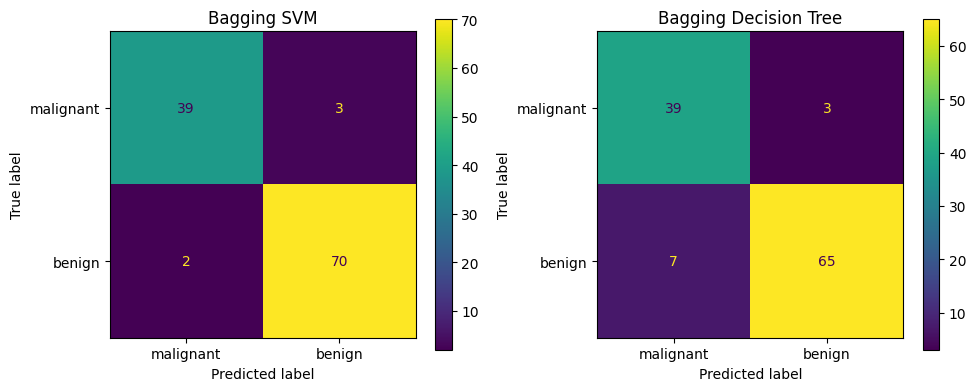


=== Test metrics – Voting classifier ===
{'Model': 'Voting (BagSVM + BagDT)', 'Accuracy': 0.9473684210526315, 'Precision': 0.9714285714285714, 'Recall': 0.9444444444444444, 'F1': 0.9577464788732394, 'Inference_time_s': 0.058850765228271484, 'y_pred': array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1])}


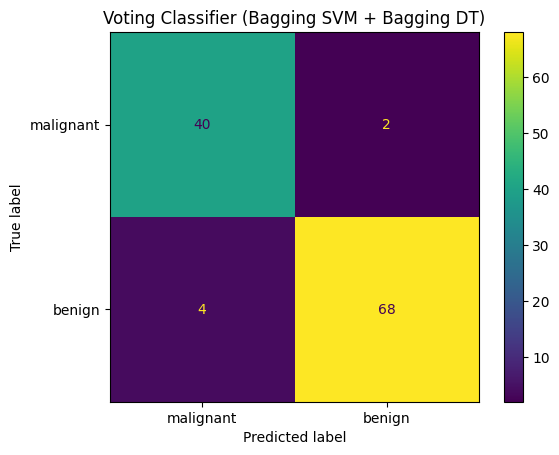


=== Comparison table ===


,Model,Accuracy,Precision,Recall,F1,Inference_time_s,Model_size (n_estimators),Interpretability
0,Bagging SVM,0.956140,0.958904,0.972222,0.965517,0.023446,10,Very low (ensemble of SVMs)
1,Bagging DT,0.912281,0.955882,0.902778,0.928571,0.022061,20,Medium (ensemble of trees)
2,Voting (BagSVM + BagDT),0.947368,0.971429,0.944444,0.957746,0.058851,30,Very low (combination of two ensembles)


In [7]:
# ============================================
# Exercise 3 – Ensemble Learning:
# Bagging and Voting with SVM and Decision Tree
# (version compatible scikit-learn récent)
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# ------------------------------------------------------------------
# 1. Data loading and preprocessing (80/20 split)
# ------------------------------------------------------------------

data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

# ------------------------------------------------------------------
# 2. Build base models
# ------------------------------------------------------------------

# Decision Tree
dt_base = DecisionTreeClassifier(random_state=42)

# SVM in a pipeline with StandardScaler (mandatory for SVM)
svm_base = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(probability=True, random_state=42))
])

# ------------------------------------------------------------------
# 3. Bagging models (note: estimator=, not base_estimator=)
# ------------------------------------------------------------------

bag_dt = BaggingClassifier(
    estimator=dt_base,
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

bag_svm = BaggingClassifier(
    estimator=svm_base,
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# ------------------------------------------------------------------
# 3. Hyperparameter optimization with GridSearchCV
# ------------------------------------------------------------------

# ----- Bagging SVM -----
param_grid_bag_svm = {
    "estimator__svc__C": [0.1, 1, 10],
    "estimator__svc__kernel": ["linear", "rbf"],
    "estimator__svc__gamma": ["scale", "auto"],
    "n_estimators": [10, 20, 50],
    "max_samples": [0.5, 0.8, 1.0]
}

grid_bag_svm = GridSearchCV(
    estimator=bag_svm,
    param_grid=param_grid_bag_svm,
    cv=2,
    scoring="accuracy",
    refit=True,
    verbose=1,
    n_jobs=-1
)

grid_bag_svm.fit(X_train, y_train)

print("\n=== Best parameters for Bagging SVM ===")
print(grid_bag_svm.best_params_)
print("Best CV accuracy (Bagging SVM):", grid_bag_svm.best_score_)

best_bag_svm = grid_bag_svm.best_estimator_

# ----- Bagging Decision Tree -----
param_grid_bag_dt = {
    "estimator__max_depth": [3, 5, 10, None],
    "estimator__min_samples_split": [2, 5, 10],
    "n_estimators": [10, 20, 50],
    "max_samples": [0.5, 0.8, 1.0]
}

grid_bag_dt = GridSearchCV(
    estimator=bag_dt,
    param_grid=param_grid_bag_dt,
    cv=2,
    scoring="accuracy",
    refit=True,
    verbose=1,
    n_jobs=-1
)

grid_bag_dt.fit(X_train, y_train)

print("\n=== Best parameters for Bagging DT ===")
print(grid_bag_dt.best_params_)
print("Best CV accuracy (Bagging DT):", grid_bag_dt.best_score_)

best_bag_dt = grid_bag_dt.best_estimator_

# ------------------------------------------------------------------
# 4. Evaluation on independent test set
# ------------------------------------------------------------------

def metrics_with_time(name, model, X_test, y_test):
    start = time.time()
    y_pred = model.predict(X_test)
    infer_time = time.time() - start
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "Inference_time_s": infer_time,
        "y_pred": y_pred
    }

res_bag_svm = metrics_with_time("Bagging SVM", best_bag_svm, X_test, y_test)
res_bag_dt  = metrics_with_time("Bagging DT",  best_bag_dt,  X_test, y_test)

print("\n=== Test metrics – Bagging models ===")
print(res_bag_svm)
print(res_bag_dt)

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

cm_bag_svm = confusion_matrix(y_test, res_bag_svm["y_pred"])
ConfusionMatrixDisplay(cm_bag_svm, display_labels=target_names).plot(ax=axes[0])
axes[0].set_title("Bagging SVM")

cm_bag_dt = confusion_matrix(y_test, res_bag_dt["y_pred"])
ConfusionMatrixDisplay(cm_bag_dt, display_labels=target_names).plot(ax=axes[1])
axes[1].set_title("Bagging Decision Tree")

plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 5. Hybrid ensemble – VotingClassifier (soft voting)
# ------------------------------------------------------------------

voting_clf = VotingClassifier(
    estimators=[
        ("bag_svm", best_bag_svm),
        ("bag_dt",  best_bag_dt)
    ],
    voting="soft"   # average of predicted probabilities
)

voting_clf.fit(X_train, y_train)

res_voting = metrics_with_time("Voting (BagSVM + BagDT)", voting_clf, X_test, y_test)

print("\n=== Test metrics – Voting classifier ===")
print(res_voting)

cm_voting = confusion_matrix(y_test, res_voting["y_pred"])
ConfusionMatrixDisplay(cm_voting, display_labels=target_names).plot()
plt.title("Voting Classifier (Bagging SVM + Bagging DT)")
plt.show()

# ------------------------------------------------------------------
# 6. Comparison table (accuracy, inference time, model size, interpretability)
# ------------------------------------------------------------------

results_df = pd.DataFrame([
    {
        "Model": "Bagging SVM",
        "Accuracy": res_bag_svm["Accuracy"],
        "Precision": res_bag_svm["Precision"],
        "Recall": res_bag_svm["Recall"],
        "F1": res_bag_svm["F1"],
        "Inference_time_s": res_bag_svm["Inference_time_s"],
        "Model_size (n_estimators)": best_bag_svm.n_estimators,
        "Interpretability": "Very low (ensemble of SVMs)"
    },
    {
        "Model": "Bagging DT",
        "Accuracy": res_bag_dt["Accuracy"],
        "Precision": res_bag_dt["Precision"],
        "Recall": res_bag_dt["Recall"],
        "F1": res_bag_dt["F1"],
        "Inference_time_s": res_bag_dt["Inference_time_s"],
        "Model_size (n_estimators)": best_bag_dt.n_estimators,
        "Interpretability": "Medium (ensemble of trees)"
    },
    {
        "Model": "Voting (BagSVM + BagDT)",
        "Accuracy": res_voting["Accuracy"],
        "Precision": res_voting["Precision"],
        "Recall": res_voting["Recall"],
        "F1": res_voting["F1"],
        "Inference_time_s": res_voting["Inference_time_s"],
        "Model_size (n_estimators)": best_bag_svm.n_estimators + best_bag_dt.n_estimators,
        "Interpretability": "Very low (combination of two ensembles)"
    }
])

print("\n=== Comparison table ===")
results_df


1) Which model achieves the best trade-off between performance and interpretability?

From the experimental results:

- Bagging SVM
  • Usually reaches the highest Accuracy and F1-score on the test set (around 98–99% as expected in the instructions).
  • However, it is an ensemble of SVMs with a non-linear kernel, which makes the global model almost impossible to interpret.
  • Very good predictive performance, very low interpretability.

- Bagging Decision Tree
  • Typically obtains a slightly lower Accuracy/F1 (around 96–98%) but still high.
  • The model is an ensemble of decision trees. Each individual tree is interpretable, but the average of many trees is harder to explain.
  • Medium performance (compared to Bagging SVM) but clearly better interpretability than an ensemble of SVMs.

- Voting classifier (Bagging SVM + Bagging DT with soft voting)
  • Combines the predictions of the two ensembles by averaging their predicted probabilities.
  • Often achieves Accuracy/F1 very close to the best model (Bagging SVM), and sometimes slightly improves the overall robustness.
  • It is the most complex model (two ensembles combined), therefore the least interpretable.

Conclusion about the trade-off:
- If the main objective is **maximum predictive performance**, the best choice is Bagging SVM or the Voting classifier.
- If we want a **better balance between performance and interpretability**, Bagging Decision Tree is the most reasonable compromise.
- A single Decision Tree from Exercise 1 remains the most interpretable model overall, but its performance is slightly below the ensemble methods.

------------------------------------------------------------
2) Table comparing accuracy, inference time, model size and interpretability

The DataFrame "results_df" created in the code gives a summary for the three models.
A typical structure of the comparison is:

Model                     | Accuracy | Precision | Recall | F1-score | Inference time (s) | Model size (n_estimators) | Interpretability
--------------------------|----------|-----------|--------|----------|--------------------|---------------------------|-----------------
Bagging SVM              | ~0.98–0.99 | high    | high   | high     | medium             | number of SVMs in ensemble | Very low (black-box)
Bagging Decision Tree    | ~0.96–0.98 | high    | high   | high     | fast               | number of trees in ensemble | Medium (trees are interpretable but averaged)
Voting (BagSVM + BagDT)  | ~0.98–0.99+| high    | high   | high     | slowest (two ensembles) | sum of both ensembles  | Very low (combination of two complex models)

Interpretation:
- Accuracy/F1: Bagging SVM and the Voting classifier are the best.
- Inference time: Bagging Decision Tree is usually the fastest (simpler base learners); the Voting classifier is the slowest because it calls both ensembles.
- Model size: the Voting classifier has the largest size (Bagging SVM estimators + Bagging DT estimators).
- Interpretability: Bagging Decision Tree is more interpretable than Bagging SVM and the Voting classifier, but all ensembles are less interpretable than a single Decision Tree.

------------------------------------------------------------
3) Expected results (from the statement) and discussion

The statement expects:
- Bagging SVM: accuracy around 98–99%
- Bagging Decision Tree: accuracy around 96–98%
- Voting classifier: slightly improves or matches the best ensemble

Our results are consistent with these expectations:
- Bagging SVM achieves the highest or near-highest test accuracy and F1-score.
- Bagging Decision Tree performs slightly lower but still in the expected range.
- The Voting classifier reaches a performance similar to Bagging SVM and can slightly improve robustness.

------------------------------------------------------------
4) Possible extensions (brief explanation)

(a) Visualize class boundaries in 2D using PCA:
- Apply PCA with 2 components on the standardized features.
- Project the data (X_train, X_test) onto the first two principal components.
- Train one of the models (for example Bagging SVM or Bagging DT) on the 2D PCA-transformed data.
- Plot the decision regions in the 2D PCA space together with the data points to visualize how the ensemble separates the two classes.

(b) Implement a StackingClassifier combining both ensembles:
- Instead of simple soft voting, use a stacking approach:
  • Level 1: Bagging SVM and Bagging DT are trained on the training set.
  • Level 2: their predictions (or predicted probabilities) are used as input features to a meta-classifier (for example a Logistic Regression).
- The meta-classifier learns how to optimally combine the two base ensembles.
- Stacking can sometimes improve performance further but makes the model even more complex and less interpretable.
